Shift from new enrolments to identity maintenance.

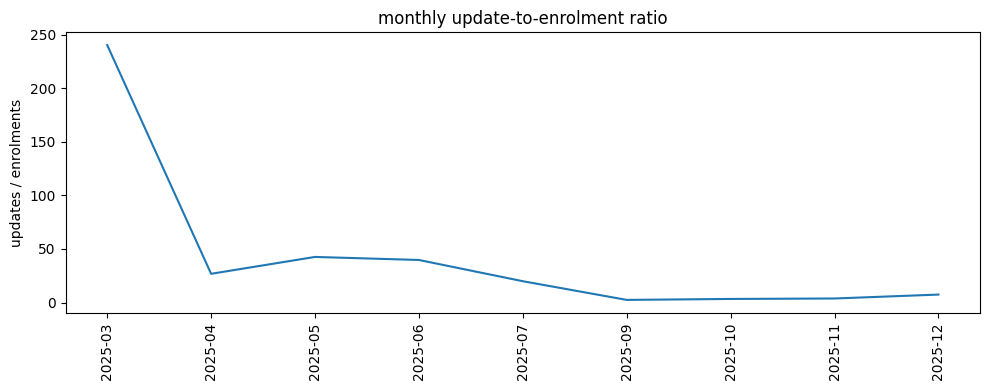

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


enrol=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrol["date"]=pd.to_datetime(enrol["date"])
enrol["month"]=enrol["date"].dt.to_period("M").astype(str)
monthly_enrol=enrol.groupby("month").size().reset_index(name="enrolments")


demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=pd.concat([demo,bio])
updates["date"]=pd.to_datetime(updates["date"])
updates["month"]=updates["date"].dt.to_period("M").astype(str)
monthly_updates=updates.groupby("month").size().reset_index(name="updates")


df=monthly_enrol.merge(monthly_updates,on="month",how="inner")
df["update_to_enrolment_ratio"]=df["updates"]/df["enrolments"]

plt.figure(figsize=(10,4))
plt.plot(df["month"],df["update_to_enrolment_ratio"])
plt.xticks(rotation=90)
plt.ylabel("updates / enrolments")
plt.title("monthly update-to-enrolment ratio")
plt.tight_layout()
plt.show()
